<a href="https://colab.research.google.com/github/helenross636/magic_season/blob/main/%23Task15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
import time

In [2]:
# Устанавливаем seed для повторяемости результатов
np.random.seed(42)
# Загружаем данные
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Преобразование размерности изображений
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
# Нормализация данных
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Преобразуем метки в категории
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
#random.seed(42)
model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/models/seed(42)/model1.h5')
model2 = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/models/seed(42)/model2.h5')
model3 = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/models/seed(42)/model3.h5')
model4 = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/models/seed(42)/model4.h5')

In [4]:
models = []
models.append(model)
models.append(model2)
models.append(model3)
models.append(model4)

In [5]:
w1500 = (models[1].layers[3].kernel)
print(w1500.shape)
w5000 = (models[2].layers[3].kernel)
print(w5000.shape)

w_PLUS = np.vstack((w1500,w5000))
print('Конкатенация: ',w_PLUS.shape)

(1500, 10)
(5000, 10)
Конкатенация:  (6500, 10)


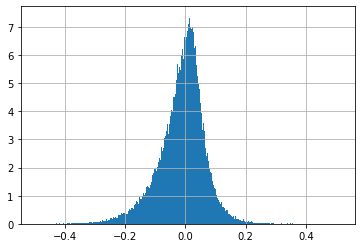

In [6]:
#plt.figure()
#plt.title('Конкатенация матриц (1500) и (5000)')
#plt.imshow(w_PLUS, cmap='hot')
#plt.colorbar()  

plt.figure()
a = w_PLUS.flatten()
plt.hist(a,bins=400,density=True)
plt.grid(True)


### Получить те элементы матрицы A[0:5000] (модель 5000), которые соответствуют элементам A[5000:] (модель 1500) по метрике корелляции больше 0.9.


матрица по метрике корелляции:  (6500, 6500)
Проверка размерности маски:  (5000, 1500)
Длина пар ключей (> 0.9):  2921


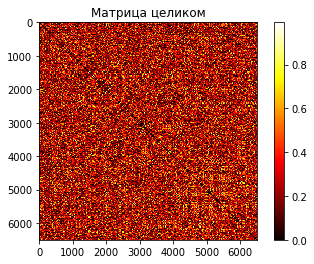

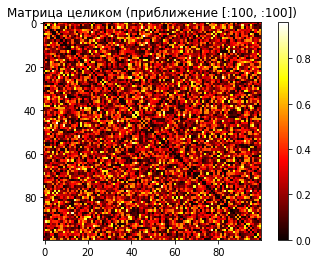

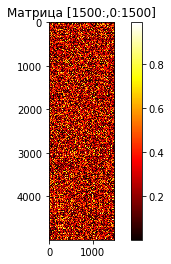

In [12]:
(y,z) = w_PLUS.shape
am = np.zeros((y,y))
am = abs(np.corrcoef(w_PLUS))
np.fill_diagonal(am, 0)
print('матрица по метрике корелляции: ',am.shape)

mask = am[1500:,0:1500] > 0.9
print('Проверка размерности маски: ', mask.shape)

similar = {} #представляют тип данных словаря dict, а словарь состоит из групп значений пар ключей
for idx, k in enumerate(mask):
  nk = k.nonzero()[0]
  if len(nk) != 0:
    similar[idx] = nk[np.argmax(am[idx,nk])]

print('Длина пар ключей (> 0.9): ',len(similar))

plt.title('Матрица целиком')
plt.imshow(am, cmap='hot', interpolation='nearest')
plt.colorbar()

plt.figure()
plt.title('Матрица целиком (приближение [:100, :100])')
plt.imshow(am[:100, :100], cmap='hot', interpolation='nearest')
plt.colorbar()

plt.figure()
plt.title('Матрица [1500:,0:1500]')
plt.imshow(am[1500:,0:1500], cmap='hot', interpolation='nearest')
plt.colorbar()


In [9]:
similar

{1: 429,
 2: 956,
 3: 814,
 5: 1009,
 6: 901,
 9: 186,
 11: 780,
 13: 845,
 14: 711,
 15: 972,
 17: 1229,
 19: 1286,
 21: 1279,
 24: 867,
 25: 1098,
 27: 11,
 30: 547,
 31: 420,
 32: 820,
 36: 1243,
 38: 951,
 40: 407,
 41: 1314,
 42: 1319,
 47: 516,
 48: 1214,
 49: 967,
 50: 197,
 53: 319,
 54: 662,
 55: 344,
 58: 1445,
 60: 174,
 61: 320,
 62: 1246,
 64: 1120,
 65: 359,
 66: 577,
 67: 945,
 68: 239,
 71: 105,
 72: 184,
 73: 344,
 74: 325,
 76: 1291,
 79: 153,
 80: 754,
 81: 1155,
 83: 402,
 84: 1102,
 87: 802,
 88: 727,
 90: 696,
 92: 691,
 93: 1066,
 94: 486,
 95: 638,
 99: 296,
 101: 1220,
 102: 174,
 104: 1297,
 105: 229,
 108: 1135,
 109: 324,
 113: 529,
 114: 852,
 115: 460,
 117: 453,
 121: 770,
 122: 1141,
 123: 591,
 125: 902,
 128: 935,
 129: 611,
 130: 386,
 131: 1096,
 132: 421,
 133: 633,
 134: 987,
 136: 454,
 137: 401,
 138: 436,
 139: 682,
 140: 86,
 141: 1410,
 142: 1331,
 143: 256,
 144: 877,
 145: 754,
 146: 1498,
 147: 230,
 148: 775,
 150: 1099,
 151: 1332,
 153: 